In [ ]:
ls /root/.cache/kagglehub/datasets/amarcodes/car-angle-classification-dataset/versions/1/dataset

0/  130/  180/  230/  270/  320/  40/  90/


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("amarcodes/car-angle-classification-dataset")

print("Path to dataset files:", path)

100%|██████████| 116M/116M [00:06<00:00, 18.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/amarcodes/car-angle-classification-dataset/versions/1


In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Convolution2D,MaxPooling2D,Flatten, GlobalAveragePooling2D
import tensorflow as tf
import matplotlib.pyplot as plt



In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IMAGE_SIZE = 224

datagen = ImageDataGenerator(validation_split=0.2,
        rescale=1./255,
        rotation_range=10,
        zoom_range=0.2
)


In [ ]:
train_generator = datagen.flow_from_directory(
    '/root/.cache/kagglehub/datasets/amarcodes/car-angle-classification-dataset/versions/1/dataset',
    target_size=(224, 224),
    batch_size=256,
    class_mode='sparse',
    subset='training'
)

test_generator = datagen.flow_from_directory(
    '/root/.cache/kagglehub/datasets/amarcodes/car-angle-classification-dataset/versions/1/dataset',
    target_size=(224, 224),
    batch_size=256,
    class_mode='sparse',
    subset='validation'
)


Found 21636 images belonging to 8 classes.
Found 5406 images belonging to 8 classes.


In [ ]:
class_names = list(train_generator.class_indices.keys())
class_names


['0', '130', '180', '230', '270', '320', '40', '90']

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG16

# Load base model
sz = 224
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(sz, sz, 3))

# Freezing the layers of the base model
for layer in vgg_model.layers:
    layer.trainable = False

# Model Creation
model_vgg = Sequential()
model_vgg.add(Input(shape=(sz, sz, 3)))
model_vgg.add(vgg_model)
model_vgg.add(Flatten())
model_vgg.add(Dense(256, activation='relu'))
model_vgg.add(Dropout(0.5))
model_vgg.add(Dense(8, activation='softmax'))

model_vgg.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_vgg.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 8)                   │           2,056 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,139,528 (80.64 MB)

 Trainable params: 6,424,840 (24.51 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
history_vgg = model_vgg.fit(
    train_generator,
    validation_data=test_generator,
    epochs=8
)


Epoch 1/8


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


85/85 ━━━━━━━━━━━━━━━━━━━━ 549s 5s/step - accuracy: 0.6076 - loss: 1.7039 - val_accuracy: 0.9271 - val_loss: 0.2450
Epoch 2/8
85/85 ━━━━━━━━━━━━━━━━━━━━ 352s 4s/step - accuracy: 0.8996 - loss: 0.3352 - val_accuracy: 0.9364 - val_loss: 0.2031
Epoch 3/8
85/85 ━━━━━━━━━━━━━━━━━━━━ 352s 4s/step - accuracy: 0.9217 - loss: 0.2694 - val_accuracy: 0.9369 - val_loss: 0.1968
Epoch 4/8
85/85 ━━━━━━━━━━━━━━━━━━━━ 356s 4s/step - accuracy: 0.9312 - loss: 0.2350 - val_accuracy: 0.9449 - val_loss: 0.1750
Epoch 5/8
85/85 ━━━━━━━━━━━━━━━━━━━━ 392s 4s/step - accuracy: 0.9344 - loss: 0.2208 - val_accuracy: 0.9452 - val_loss: 0.1777
Epoch 6/8
85/85 ━━━━━━━━━━━━━━━━━━━━ 368s 4s/step - accuracy: 0.9382 - loss: 0.2051 - val_accuracy: 0.9452 - val_loss: 0.1786
Epoch 7/8
85/85 ━━━━━━━━━━━━━━━━━━━━ 382s 4s/step - accuracy: 0.9411 - loss: 0.1923 - val_accuracy: 0.9488 - val_loss: 0.1697
Epoch 8/8
85/85 ━━━━━━━━━━━━━━━━━━━━ 352s 4s/step - accuracy: 0.9407 - loss: 0.1903 - val_accuracy: 0.9460 - val_loss: 0.1736


In [ ]:
scores = model_vgg.evaluate(test_generator)


22/22 ━━━━━━━━━━━━━━━━━━━━ 69s 3s/step - accuracy: 0.9481 - loss: 0.1683


In [ ]:
acc = history_vgg.history['accuracy']
val_acc = history_vgg.history['val_accuracy']

loss = history_vgg.history['loss']
val_loss = history_vgg.history['val_loss']


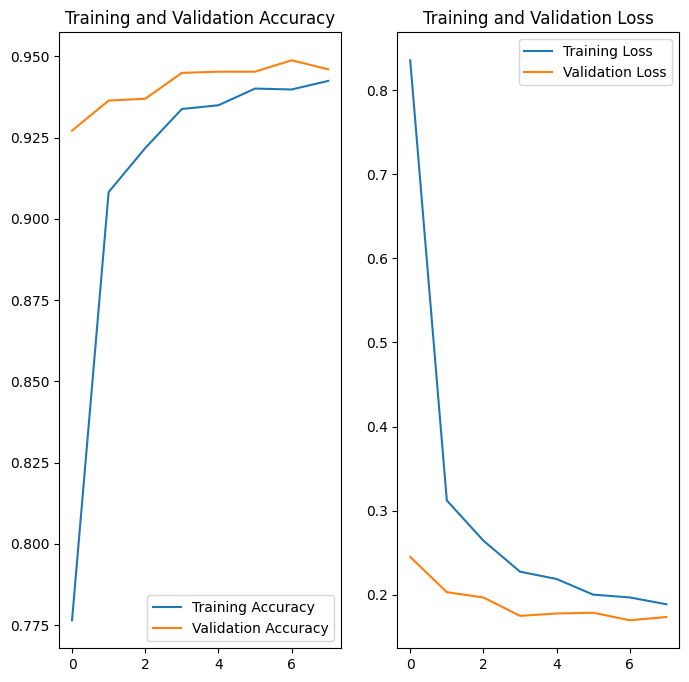

In [ ]:
import matplotlib.pyplot as plt
EPOCHS = 8

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
# Save the entire model
model_vgg.save('model.h5')


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input

# Load and preprocess the image
img_path = '/content/1628.jpeg'
img = load_img(img_path, target_size=(224, 224))  # Resize to match the input size (224x224)
img_array = img_to_array(img)  # Convert image to array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = preprocess_input(img_array)  # Preprocess for VGG16 (scaling, etc.)


In [ ]:
# Perform inference
predictions = model_vgg.predict(img_array)

# Get the predicted class
predicted_class = np.argmax(predictions, axis=-1)

# Print the predicted class
print(f"Predicted class: {predicted_class[0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted class: 7
